# Task 4: To Explore Decision Tree Algorithm
by Vikas Bhardwaj

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\91701\\Desktop\\assingments\\iris_dataset.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull()


,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [8]:
data_cp=data.copy()

In [9]:
data_cp.drop("species",axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["species"]=le.fit_transform(data["species"])

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
Y=data.iloc[:,-1]
X=data_cp.values

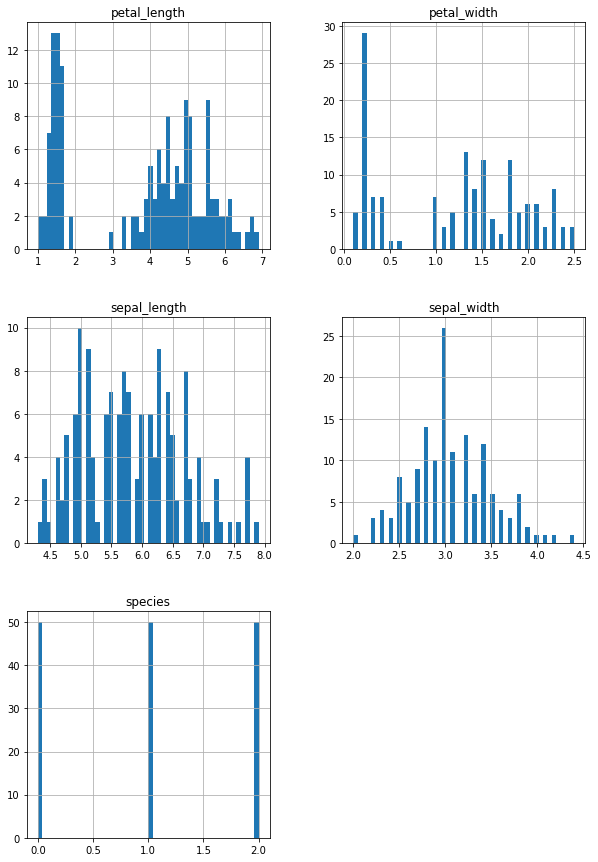

In [13]:
data.hist(bins=50,figsize=(10,15))
plt.show()

In [14]:
corr_matrix=data.corr()
corr_matrix["species"].sort_values(ascending=False)

species         1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.426658
Name: species, dtype: float64

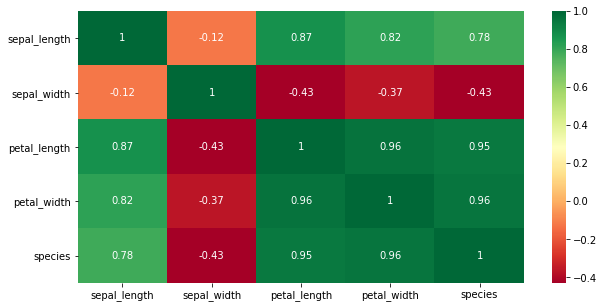

In [15]:
correlation=corr_matrix.index
plt.figure(figsize=(10,5))
g=sns.heatmap(data=data[correlation].corr(),annot=True,cmap='RdYlGn')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
Y_predict


array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [18]:
Y_actual=Y_test

In [19]:
df=pd.DataFrame({"Y_predict":Y_predict,"Y_actual":Y_test})

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(Y_test,Y_predict)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [21]:
accuracy_score(Y_test,Y_predict)

0.9666666666666667

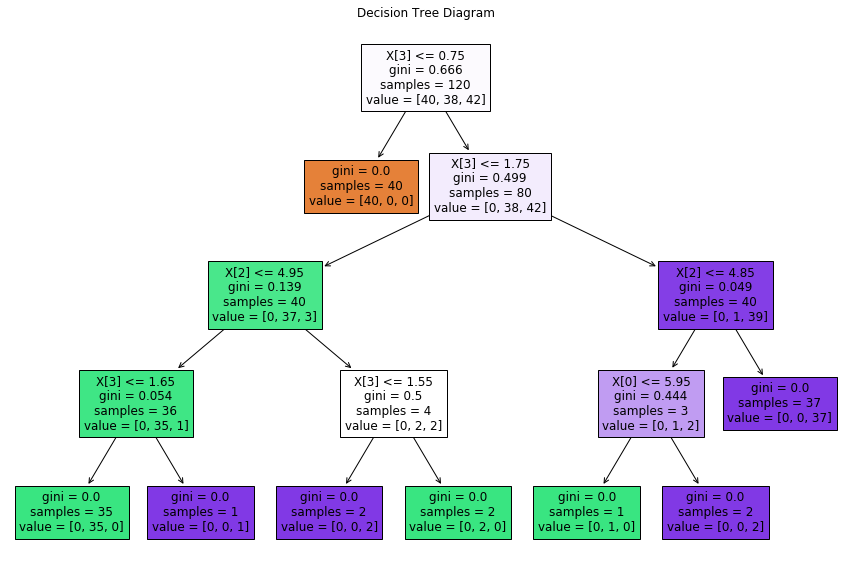

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.title("Decision Tree Diagram")
plt.show()